## 라이브러리

### 기존

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

### 신규

In [2]:
# 결측치 확인하는 라이브러리
import missingno as msno

# seaborn의 다른 라이브러리
import seaborn.objects as so

# Warning 메세지를 뜨지 않게 해줌
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('Titanic-Dataset.csv')
df=titanic.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치

### 결측치 확인

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

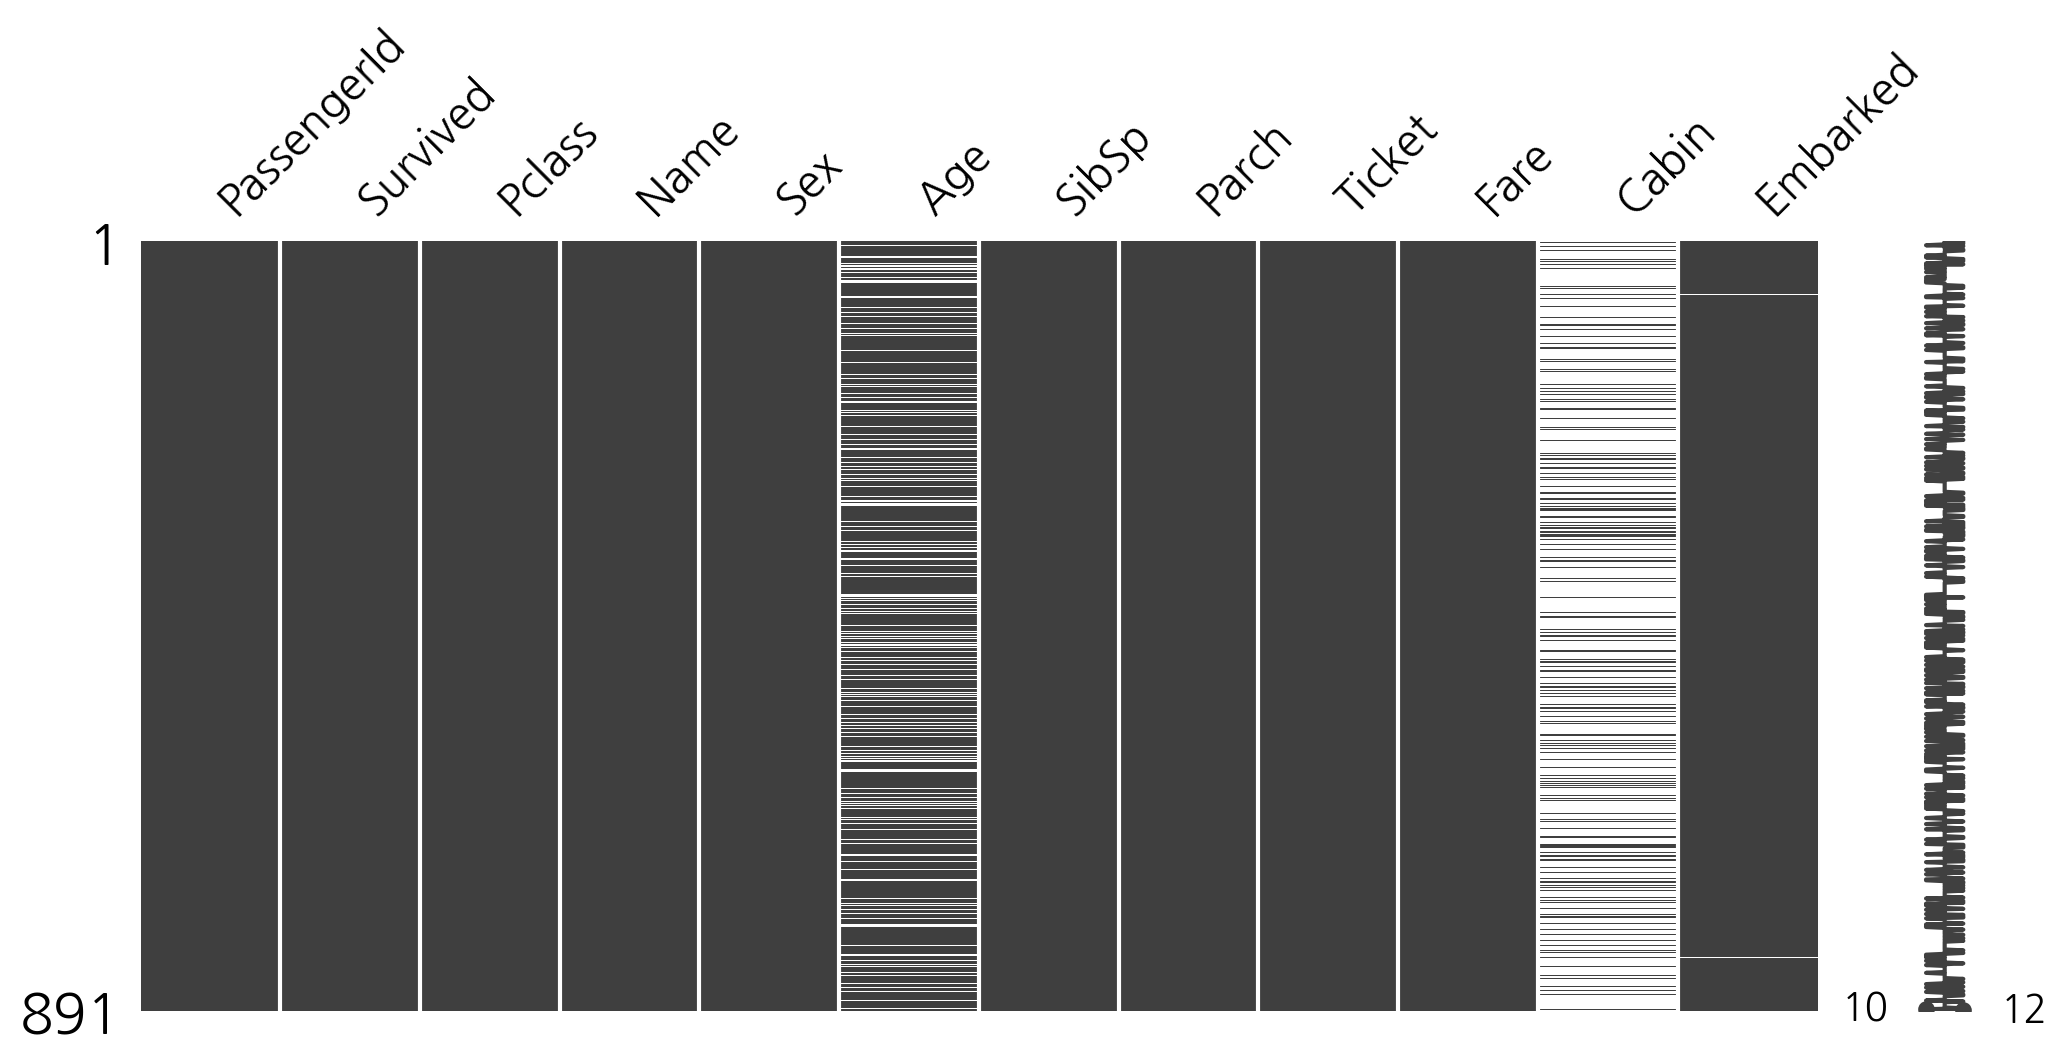

In [6]:
msno.matrix(df, figsize=(12,5))

### 결측치 처리 - Age

#### 제거

In [7]:
df.dropna(subset=['Cabin'])
#df.dropna(subset=['Cabin'], inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### 대체 - 단일대체법

##### 평균, 중앙값, 최빈값

In [8]:
df2=df.copy()

In [9]:
print(f'평균: {round(df.Age.mean())}')
print(f'중앙값: {df.Age.median()}')
print(f'최빈값: {df.Age.mode()[0]}') # 최빈값의 경우 여러개일 경우 여러개를 반환하기 때문에 indexing이 필요함.

평균: 30
중앙값: 28.0
최빈값: 24.0


In [10]:
df2.Age=df.Age.fillna(round(df.Age.mean()))

In [11]:
print(f'대체 전: {df.Age.isna().sum()}')
print(f'대체 후: {df2.Age.isna().sum()}')

대체 전: 177
대체 후: 0


In [12]:
print(f'평균: {round(df2.Age.mean())}')
print(f'중앙값: {df2.Age.median()}')
print(f'최빈값: {df2.Age.mode()[0]}')

평균: 30
중앙값: 30.0
최빈값: 30.0


In [13]:
print(f'대체 전: {df.Age.std()}')
print(f'대체 후: {df2.Age.std()}')

대체 전: 14.526497332334042
대체 후: 13.002570039820952


##### 다른 변수의 그룹별 대표값

In [14]:
df2.Age=df.groupby(['SibSp', 'Parch'])['Age'].transform(lambda x: x.fillna(x.median()))

In [15]:
print(f'대체 전: {df.Age.isna().sum()}')
print(f'대체 후: {df2.Age.isna().sum()}')

대체 전: 177
대체 후: 7


In [16]:
df2.Age=df2.Age.fillna(round(df2.Age.mean()))

In [17]:
print(f'대체 후: {df2.Age.isna().sum()}')

대체 후: 0


In [18]:
print(f'평균: {round(df2.Age.mean())}')
print(f'중앙값: {df2.Age.median()}')
print(f'최빈값: {df2.Age.mode()[0]}')

평균: 30
중앙값: 29.5
최빈값: 29.5


In [19]:
print(f'대체 전: {df.Age.std()}')
print(f'대체 후: {df2.Age.std()}')

대체 전: 14.526497332334042
대체 후: 13.13800429431879


##### 논리적 대체

In [20]:
df.Age.sort_values().unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [21]:
df[df.Age==0.42] # 실제로 5개월 된 아기였음. + master는 Mr보다 어린 남자아이

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C


In [22]:
df[df.Age==0.67] # 14개월 된 아기 -> 오류

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,NaN,S


In [23]:
df[df.Age==0.75] # 약 3, 4살의 아기 오류

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C


In [24]:
df[df.Name.str.contains('Baclini')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.00,0,3,2666,19.2583,NaN,C


In [25]:
df[df.Age.isna()] # Moran, Mr.James -> 83년생 약 29세

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


### 결측치 처리 - Cabin (논리적)

In [26]:
# Cabin의 경우 객실번호로 알파벳 + 숫자 조합으로 구성
# 결측치를 대체한다면 ticket, Fare, Pclass, Embarked, 외부데이터를 활용할 수 있을 것
# 문자형이기 때문에 수치형으로 변환해줘야 가능

In [27]:
df2=df.copy()

In [28]:
df2['Cabin2']=df['Cabin'].str[0]

In [29]:
df2.groupby('Cabin2').Survived.value_counts()

Cabin2  Survived
A       0            8
        1            7
B       1           35
        0           12
C       1           35
        0           24
D       1           25
        0            8
E       1           24
        0            8
F       1            8
        0            5
G       0            2
        1            2
T       0            1
Name: count, dtype: int64

- Cabin은 선실 번호로 도메인과 결합하면 유의미한 결과 도출 가능
-> 하지만 결측치가 너무 많음 / 버리는 것이 합리적

- 도메인에 따르면 F 갑판에서 충돌이 일어났고, B, C가 그 다음으로 위험했다고 함.


## 이상치

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

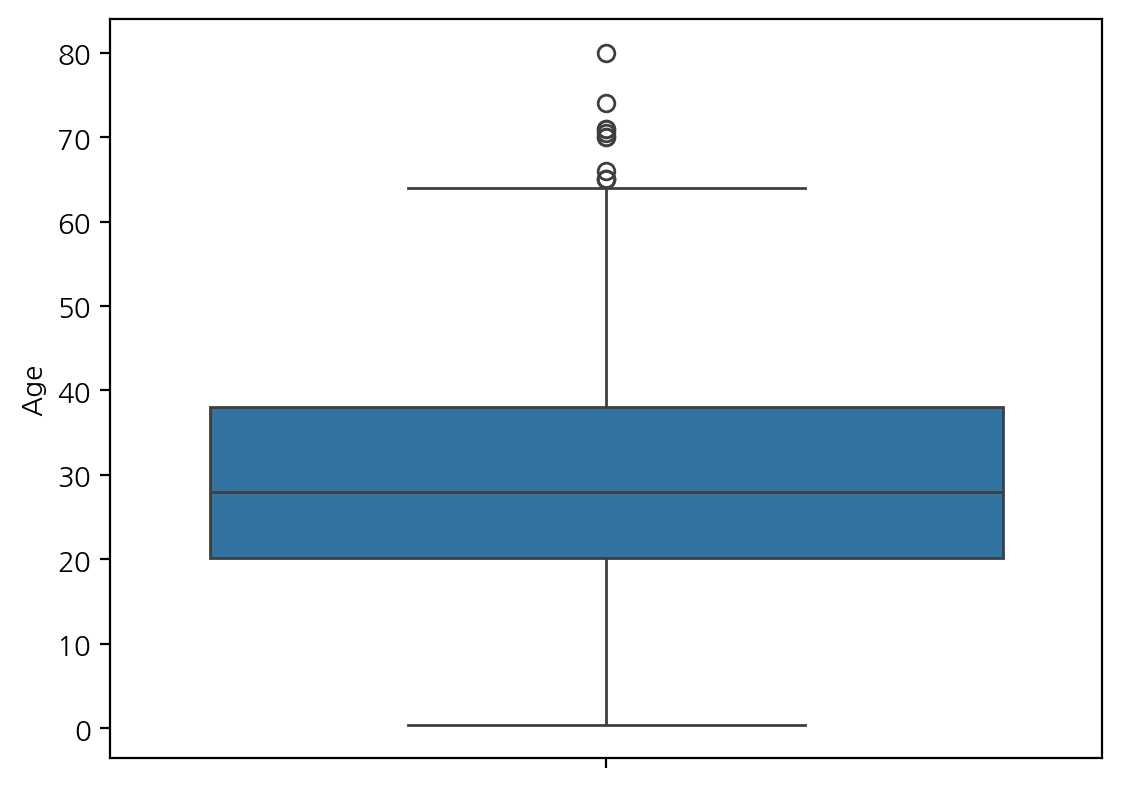

In [32]:
sns.boxplot(df.Age)

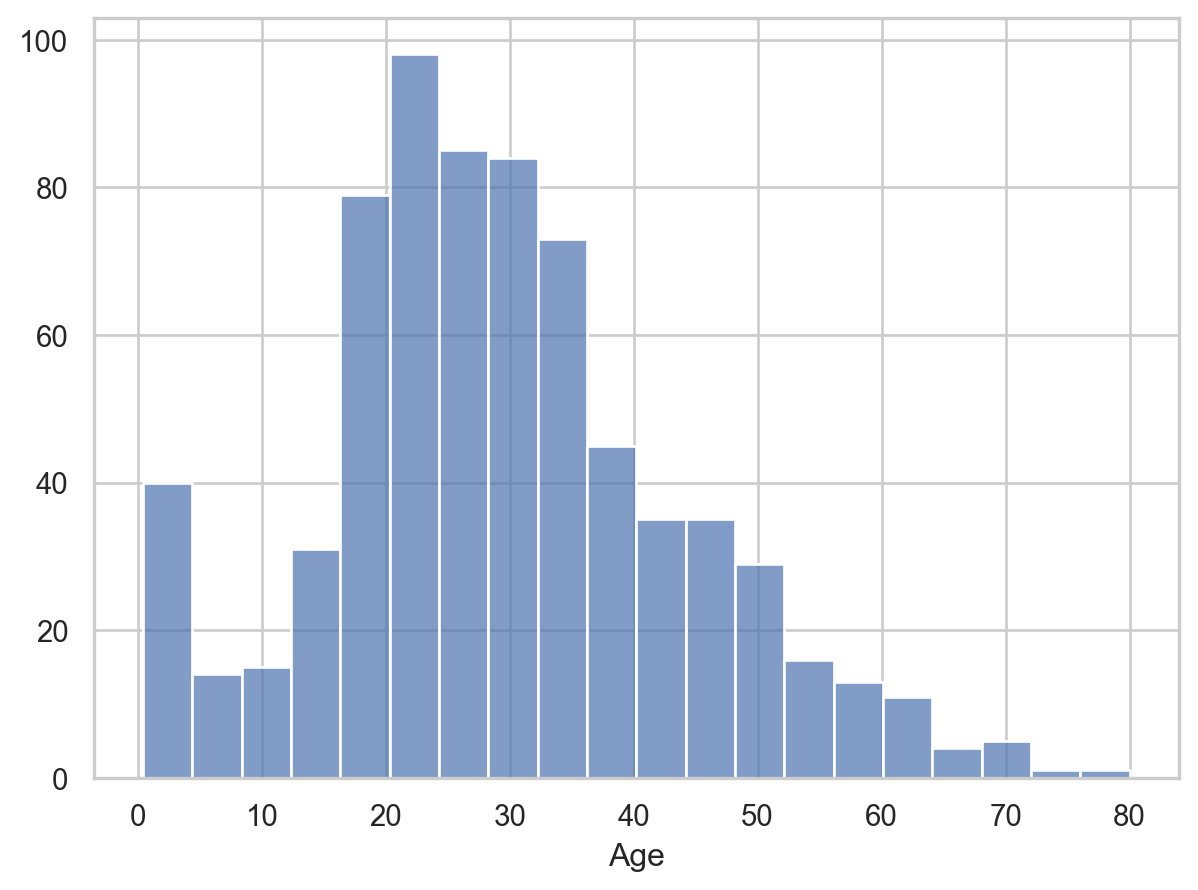

In [33]:
(
    so.Plot(df, x='Age')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

<Axes: ylabel='Age'>

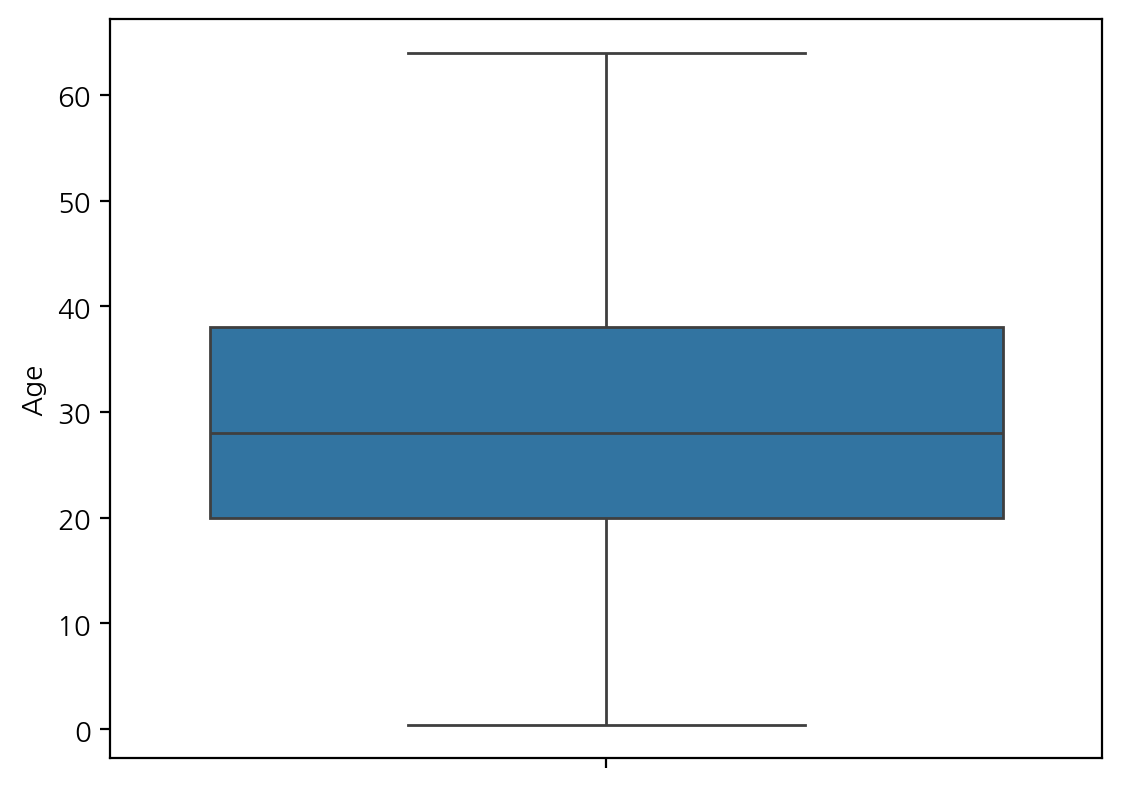

In [34]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2=df[(df.Age<upper_bound)&(df.Age>lower_bound)]
# 이상치 제거 확인
sns.boxplot(df2.Age)

In [35]:
df.Fare.round().unique()

array([  7.,  71.,   8.,  53.,  52.,  21.,  11.,  30.,  17.,  27.,  31.,
        16.,  29.,  13.,  18.,  26.,  36., 263.,  28., 147.,  10.,  82.,
         9.,  42.,  22.,  40.,  77.,  62.,  47.,  80.,  83.,  15.,  74.,
        14.,  56.,  12.,  34.,  61.,  35.,  63.,  23.,  24., 248.,  79.,
        37.,  67.,  70.,  55.,  25.,   0.,  39.,  50.,   6.,  19., 113.,
        76.,  90.,  20.,  86., 512., 153., 136.,  78.,  91., 152., 111.,
       109.,  57., 262., 165., 134.,  58.,  75.,  69., 212.,   4., 228.,
       120.,  32.,  89.,  38.,  59.,  94., 222., 106.,  51.,  33.,  65.,
       211.,   5.])

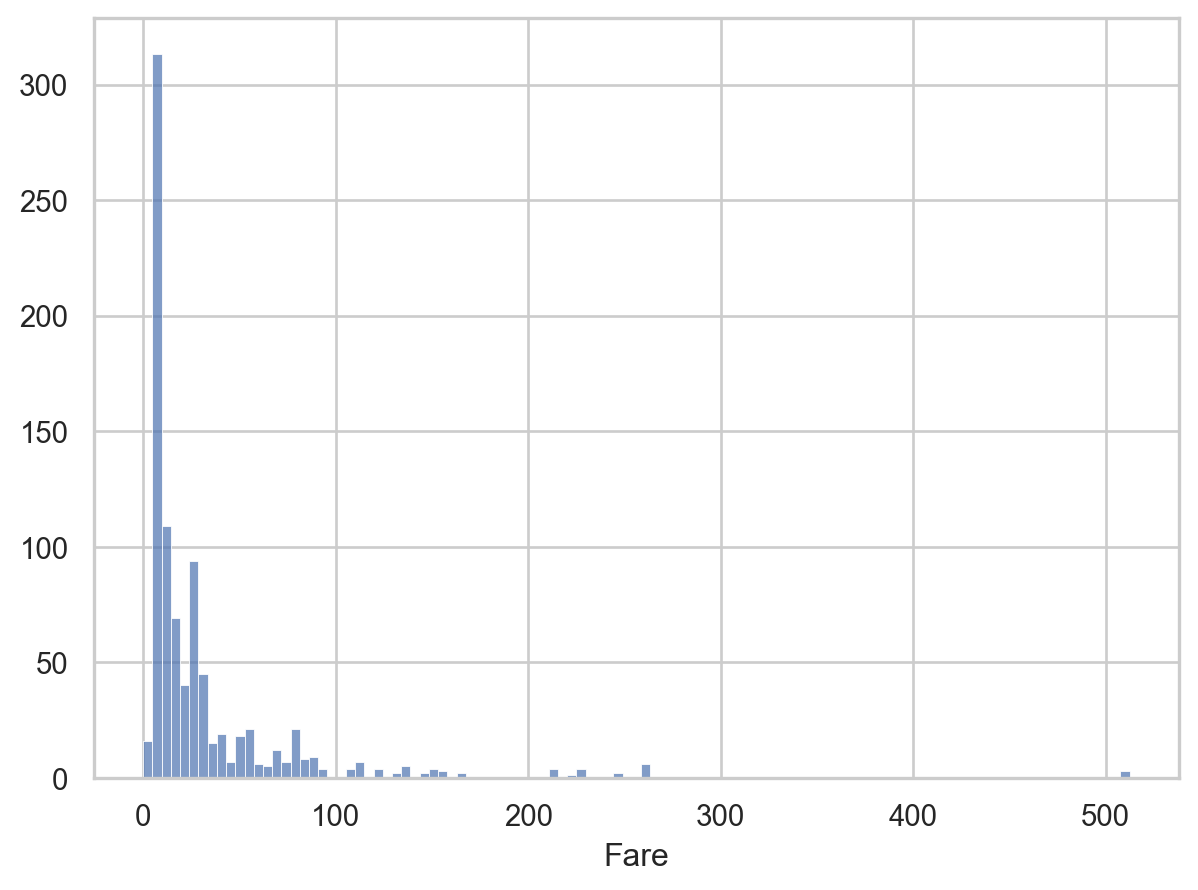

In [36]:
so.Plot(df, x='Fare').add(so.Bars(), so.Hist()).theme({**sns.axes_style("whitegrid")})

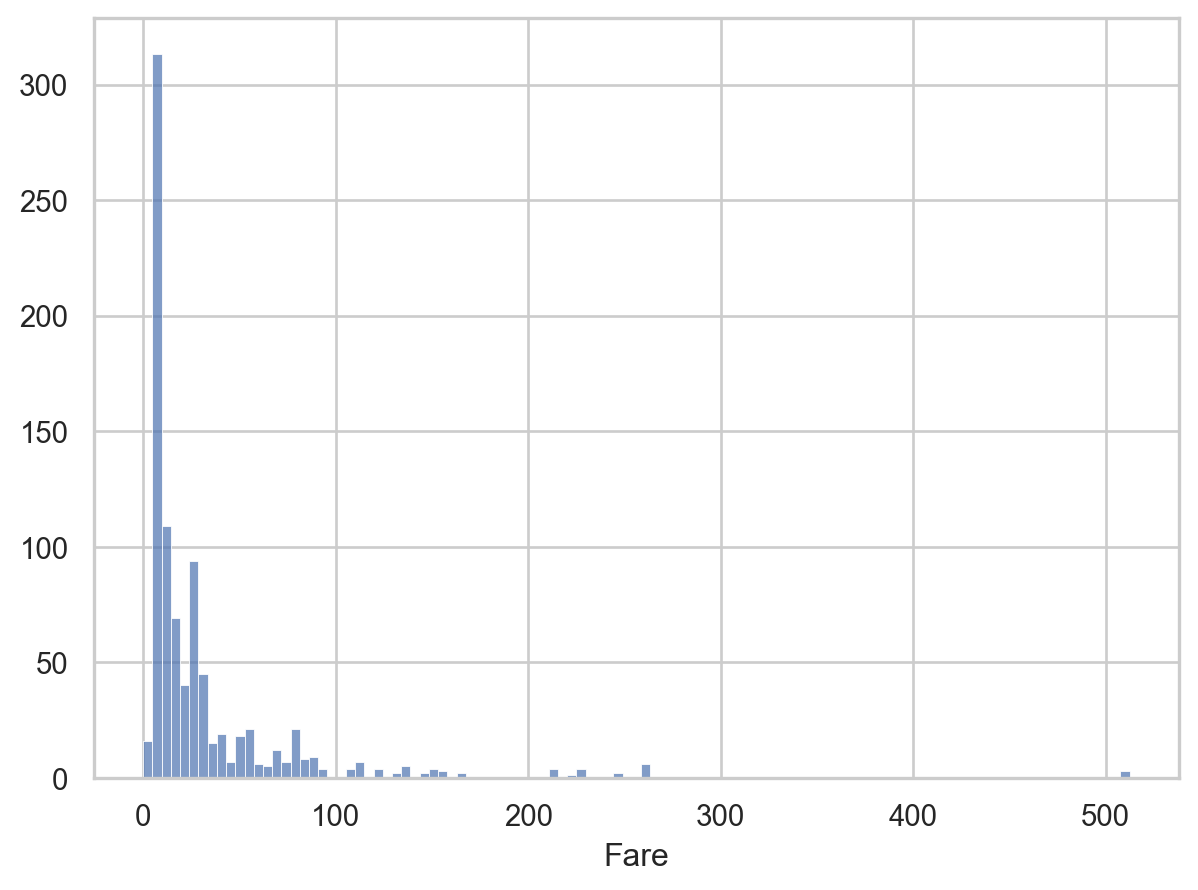

In [37]:
(
    so.Plot(df, x='Fare')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

In [38]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


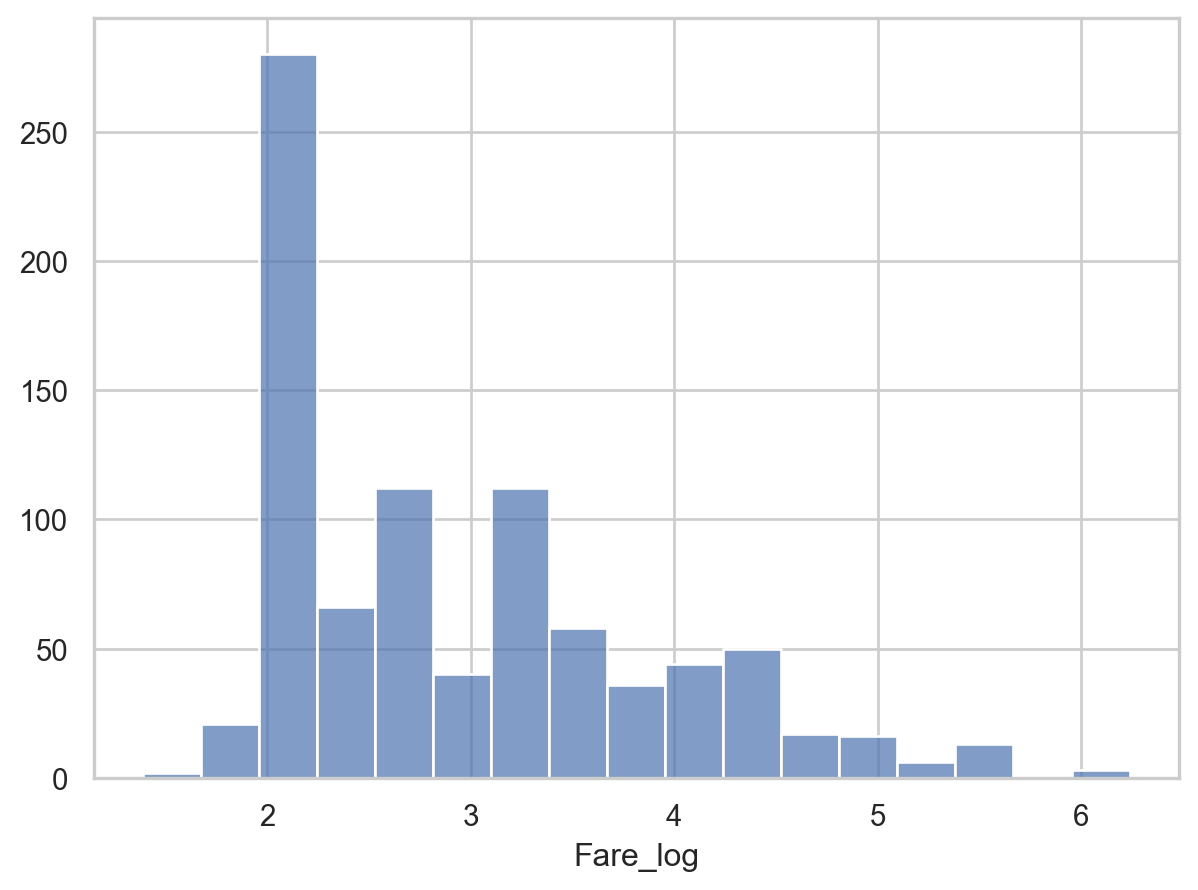

In [39]:
df['Fare_log']=np.log(df['Fare'])
(
    so.Plot(df, x='Fare_log')
    .add(so.Bars(), so.Hist())
    .theme({**sns.axes_style("whitegrid")})
)

In [40]:
# 나이에 소수점이 있다.
df.Age.unique()
# 방법 1: 소수점은 해당 나이라고 판단하여 내림한다.
# 방법 2: 0.xx 같은 경우는 소수점 뒷자리가 나이일 수도 있으니 100을 곱하고 나머지만 내림한다.

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [41]:
# 16살인데 부모자식수가 3인 경우가 존재
df.groupby('Age')['Parch'].max().sort_values(ascending=False).head(20)
# 가정 1: 부모뿐 아니라 조부모까지 더한 경우
# 가정 2: 부모가 3명
# 가정 3: 부모 2명에 자식 1명
# 가정 4: 이상치

Age
43.00    6
38.00    5
41.00    5
39.00    5
64.00    4
40.00    4
45.00    4
29.00    4
48.00    3
24.00    3
16.00    3
54.00    3
8.00     2
23.00    2
36.50    2
36.00    2
40.50    2
0.83     2
0.92     2
1.00     2
Name: Parch, dtype: int64

## 변수변환 & 파생변수

### 변수변환

- int: 정수형
- float: 실수형
- object: 문자형
- category: 범주형
- datetime: 날짜형

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


In [43]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [44]:
df.Embarked.astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [45]:
df.Embarked=df.Embarked.astype('category')
df.Embarked.astype('category')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  Fare_log     891 non-null    float64 
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 84.7+ KB


In [47]:
df.Name.dtype

dtype('O')

In [48]:
df.Pclass=df.Pclass.astype('category')
df.Pclass.astype('category')

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: category
Categories (3, int64): [1, 2, 3]

In [49]:
df.Age.dropna().astype('int')

0      22
1      38
2      26
3      35
4      35
       ..
885    39
886    27
887    19
889    26
890    32
Name: Age, Length: 714, dtype: int32

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
 12  Fare_log     891 non-null    float64 
dtypes: category(2), float64(3), int64(4), object(4)
memory usage: 78.7+ KB


In [51]:
data = {'Date': [20220101, 20220102, 20220103]}

df_date = pd.DataFrame(data)

df_date['Date_format'] = pd.to_datetime(df_date['Date'], format='%Y%m%d')

df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3 non-null      int64         
 1   Date_format  3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 180.0 bytes


- Y: 네자리수 연도
- y: 두자리수 연도
- 영어는 따로 format 지정 안해도 알아서 바꿔줌 ex) 'April 04, 2022' -> '2022-04-04'

In [52]:
df_date['Date']

0    20220101
1    20220102
2    20220103
Name: Date, dtype: int64

In [53]:
df_date['Date_format'].dt.strftime('%d')

0    01
1    02
2    03
Name: Date_format, dtype: object

### 파생변수

#### 동승자

In [54]:
# 티켓 번호를 기준으로 그룹 ID 생성
df['GroupID'] = df.groupby('Ticket').ngroup()

# 동승자 여부를 나타내는 'HasCompanion' 변수 생성
df['HasCompanion'] = df.duplicated(subset='Ticket', keep=False).astype(int)

# 그룹 ID가 혼자인 경우 GroupID를 -1로 변경
df.loc[df['HasCompanion'] == 0, 'GroupID'] = -1

In [55]:
df.groupby('HasCompanion').Survived.value_counts()

HasCompanion  Survived
0             0           384
              1           163
1             1           179
              0           165
Name: count, dtype: int64

동승자 수를 파악할 수도 있고, Pclass 등 다른 변수와의 관계를 살펴보는 것도 도움이 될 것이다.

#### 가족 구성원 수

In [56]:
df.SibSp+df.Parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [57]:
# 가족 구성원 변수 - 가족 구성원이 많을 수록 생존에 유리 or 불리했을 수 있음. 또한 가족 구성원과 가장을 찾는다면 가장의 생존율도 확인 가능
# 변수를 새로 생성할 때는 .을 사용하지 못함
df2['family_size']=df.SibSp+df.Parch
df2.family_size

0      1
1      1
2      0
3      1
4      0
      ..
885    5
886    0
887    0
889    0
890    0
Name: family_size, Length: 703, dtype: int64

마찬가지로 다른 변수와 관계를 살펴보는 것도 좋고, 가족 구성원 수와 동승자 수가 다르다면 친구관계, 동업자 등 다른 관계임을 알 수도 있다.

#### Miss, Mr, Mrs, Master

In [58]:
df.loc[df.Name.str.contains('Miss.'),'Title']='Miss' # 미혼 여성
df.loc[df.Name.str.contains('Ms.'),'Title']='Ms' # 이혼한 여성 or 기혼/미혼을 밝히고 싶지 않은 여성
df.loc[df.Name.str.contains('Mr.'),'Title']='Mr' # 남성
df.loc[df.Name.str.contains('Mrs.'),'Title']='Mrs' # 기혼의 여성
df.loc[df.Name.str.contains('Master.'),'Title']='Master' # 어린 남자 아이

In [59]:
df[df.Title=='nan'] # Dr., Rev. 등등이 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log,GroupID,HasCompanion,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,3.322183,-1,0,nan
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,2.564949,-1,0,nan
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,2.527727,-1,0,nan
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,4.499810,92,1,nan
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S,3.258097,144,1,nan
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,2.639057,-1,0,nan
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,4.238445,581,1,nan
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,2.351375,-1,0,nan
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,3.417727,-1,0,nan
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,3.279030,-1,0,nan


나이 결측치를 대체하는데 유용하게 쓰일듯

#### 기타

In [60]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Fare_log', 'GroupID',
       'HasCompanion', 'Title'],
      dtype='object')

추가적인 아이디어
- ticket에서 규칙성을 찾을 수 있음.
- 나이대 별로 재 범주화 가능
- Pclass와 Fare를 통해 Cabin을 예측할 수도 있음.
- 당시 수온, 구조하러 온 시간, 객실에서 갑판까지 이동하는 시간 등 외부 데이터를 활용 가능